#RETAIL SALES DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

### Stores Dataset

In [ ]:
stores=pd.read_csv('/content/stores.csv')

In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
numerical_cols = stores.select_dtypes(include=np.number).columns.tolist()
categorical_cols = stores.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['store_nbr', 'cluster']
Categorical columns: ['city', 'state', 'type']


In [ ]:
stores.dtypes

,0
store_nbr,int64
city,object
state,object
type,object
cluster,int64


In [ ]:
stores.shape

(54, 5)

In [ ]:
stores = stores.drop(columns=['type'])

In [ ]:
for col in stores.columns:
  print(f'{col}: {stores[col].nunique()} unique values')

store_nbr: 54 unique values
city: 22 unique values
state: 16 unique values
cluster: 17 unique values


In [ ]:
stores.isnull().sum()

,0
store_nbr,0
city,0
state,0
cluster,0


In [ ]:
duplicateRows = stores[stores.duplicated()]
if not duplicateRows.empty:
    print("Duplicate Rows based on all columns are:\n", duplicateRows)
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.


Hence there are unique or non duplicate rows in Stores DataFrame.

### Oil Dataset

In [ ]:
oil=pd.read_csv('/content/oil.csv')

In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
numerical_cols = oil.select_dtypes(include=np.number).columns.tolist()
categorical_cols = oil.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['dcoilwtico']
Categorical columns: ['date']


In [ ]:
oil.shape

(1218, 2)

In [ ]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
for col in oil.columns:
  print(f'{col}: {oil[col].nunique()} unique values')

date: 1218 unique values
dcoilwtico: 998 unique values


In [ ]:
oil.dtypes

,0
date,object
dcoilwtico,float64


In [ ]:
oil.isnull().sum()

,0
date,0
dcoilwtico,43


In [ ]:
def clean_oil_data(oil):
    oil['date'] = pd.to_datetime(oil['date'])
    oil.set_index('date', inplace=True)
    oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='time').bfill()
    oil.reset_index(inplace=True)

oil_data = clean_oil_data(oil)
print(oil)

           date  dcoilwtico
0    2013-01-01       93.14
1    2013-01-02       93.14
2    2013-01-03       92.97
3    2013-01-04       93.12
4    2013-01-07       93.20
...         ...         ...
1213 2017-08-25       47.65
1214 2017-08-28       46.40
1215 2017-08-29       46.46
1216 2017-08-30       45.96
1217 2017-08-31       47.26

[1218 rows x 2 columns]


The missing values of the oil prices are filled with backward fill method.

In [ ]:
duplicateRows = oil[oil.duplicated()]
if not duplicateRows.empty:
    print("Duplicate Rows based on all columns are:\n", duplicateRows)
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.


Thus, no duplicate rows in Oil DataFrame.

### Transactions Dataset

In [ ]:
transactions=pd.read_csv('/content/transactions.csv')

In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
numerical_cols = transactions.select_dtypes(include=np.number).columns.tolist()
categorical_cols = transactions.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['store_nbr', 'transactions']
Categorical columns: ['date']


In [ ]:
transactions.dtypes

,0
date,object
store_nbr,int64
transactions,int64


In [ ]:
transactions['date']=pd.to_datetime(transactions['date'])
transactions.dtypes

,0
date,datetime64[ns]
store_nbr,int64
transactions,int64


In [ ]:
transactions.shape

(83488, 3)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [ ]:
transactions.isna().sum()

,0
date,0
store_nbr,0
transactions,0


In [ ]:
duplicateRows = transactions[transactions.duplicated()]
if not duplicateRows.empty:
    print("Duplicate Rows based on all columns are:\n", duplicateRows)
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.


In [ ]:
holiday_events=pd.read_csv('/content/holidays_events.csv')

In [ ]:
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,02-03-2012,Holiday,Local,Manta,Fundacion de Manta,False
1,01-04-2012,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,12-04-2012,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,14-04-2012,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,21-04-2012,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holiday_events.shape

(350, 6)

In [ ]:
holiday_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [ ]:
holiday_events['date'] = pd.to_datetime(holiday_events['date'], format='%d-%m-%Y')
holiday_events.dtypes


,0
date,datetime64[ns]
type,object
locale,object
locale_name,object
description,object
transferred,bool


In [ ]:
holiday_events.isna().sum()

,0
date,0
type,0
locale,0
locale_name,0
description,0
transferred,0


In [ ]:
duplicateRows = holiday_events[holiday_events.duplicated()]
if not duplicateRows.empty:
    print("Duplicate Rows based on all columns are:\n", duplicateRows)
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.


There are no duplicate rows in Holiday Events DataFrame.

In [ ]:
def resumetable(df):
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary['Missing Values'] = df.isna().sum().values
    summary['Unique Values'] = df.nunique().values
    summary['Min Value'] = df.min().values
    summary['Max Value'] = df.max().values
    return summary

def print_with_title(title, content):
    print("=" * 30)
    print(title)
    print("=" * 30)
    print(content)

holiday_summary = resumetable(holiday_events)
print_with_title("holidays_data summary", holiday_summary)

oil_summary = resumetable(oil)
print_with_title("oil_data summary", oil_summary)

transactions_summary = resumetable(transactions)
print_with_title("transactions_data summary", transactions_summary)

stores_summary = resumetable(stores)
print_with_title("stores_data summary", stores_summary)

holidays_data summary
                  Data Type  Missing Values  Unique Values  \
date         datetime64[ns]               0            312   
type                 object               0              6   
locale               object               0              3   
locale_name          object               0             24   
description          object               0            103   
transferred            bool               0              2   

                        Min Value                       Max Value  
date          2012-03-02 00:00:00             2017-12-26 00:00:00  
type                   Additional                        Work Day  
locale                      Local                        Regional  
locale_name                Ambato  Santo Domingo de los Tsachilas  
description  Batalla de Pichincha                   Viernes Santo  
transferred                 False                            True  
oil_data summary
                 Data Type  Missing Values  Unique

## Pre EDA

In [ ]:
holiday_events_prob = holiday_events.groupby(['type', 'locale']).size() / len(holiday_events)
holiday_events_prob


type        locale  
Additional  Local       0.031429
            National    0.114286
Bridge      National    0.014286
Event       National    0.160000
Holiday     Local       0.391429
            National    0.171429
            Regional    0.068571
Transfer    Local       0.011429
            National    0.022857
Work Day    National    0.014286
dtype: float64

In [ ]:

def calculate_cluster_probabilities(stores_df):
    cluster_counts = stores_df['cluster'].value_counts()
    cluster_probabilities = cluster_counts / len(stores_df)
    cluster_probabilities = cluster_probabilities.sort_index() # Sort by cluster
    return cluster_probabilities

cluster_probabilities = calculate_cluster_probabilities(stores)
cluster_probabilities


,count
cluster,
1,0.055556
2,0.037037
3,0.129630
4,0.055556
5,0.018519
6,0.111111
7,0.037037
8,0.055556
9,0.037037


In [ ]:

def categorize_transactions(transactions_df):
    mean_transactions = transactions_df['transactions'].mean()

    def assign_category(transaction_count):
      if transaction_count > mean_transactions * 1.2:  # 20% higher than mean as high
        return 'high'
      elif transaction_count < mean_transactions * 0.8:  # 20% less than mean as low
        return 'low'
      else:
        return 'medium'

    transactions_df['transaction_category'] = transactions_df['transactions'].apply(assign_category)
    return transactions_df

transactions = categorize_transactions(transactions)

def calculate_transaction_probabilities(transactions_df):
    category_counts = transactions_df['transaction_category'].value_counts()
    category_probabilities = category_counts / len(transactions_df)
    return category_probabilities

transaction_probabilities = calculate_transaction_probabilities(transactions)
transaction_probabilities


,count
transaction_category,
low,0.473984
medium,0.266194
high,0.259822


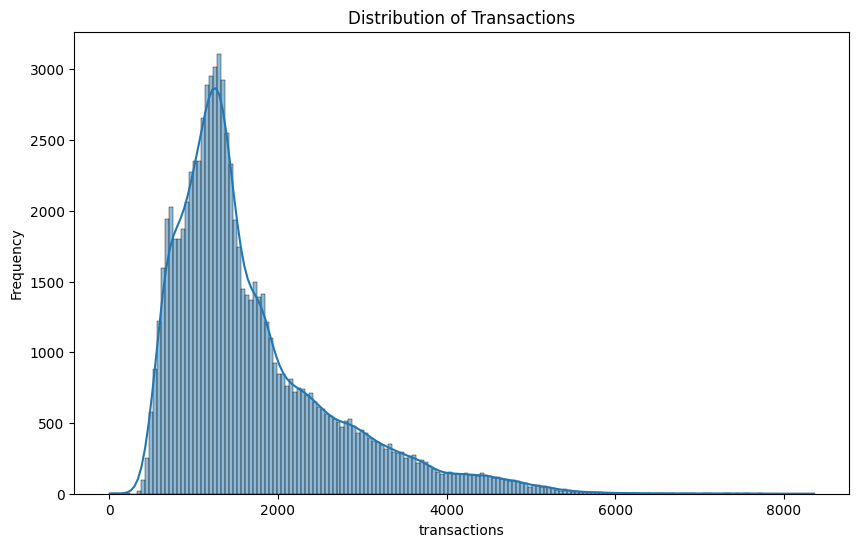

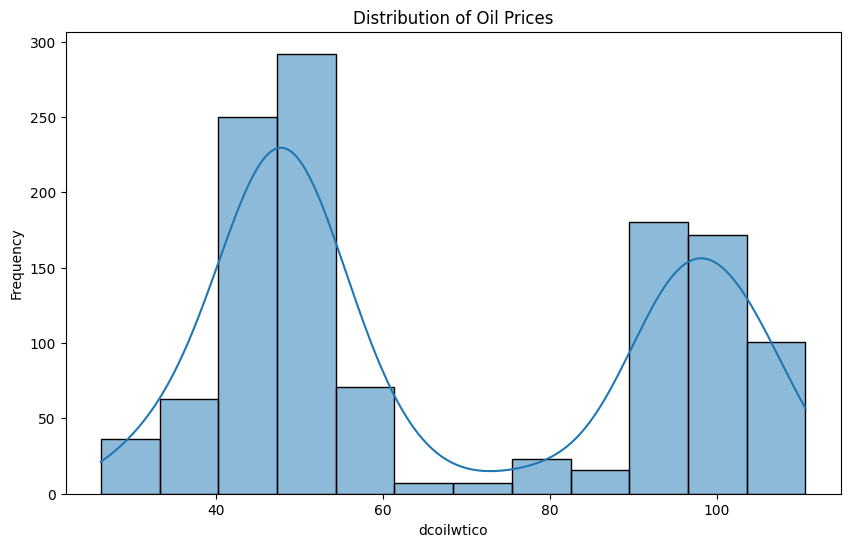

In [ ]:

import matplotlib.pyplot as plt
def plot_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_distribution(transactions, 'transactions', 'Distribution of Transactions')
plot_distribution(oil, 'dcoilwtico', 'Distribution of Oil Prices')




count    1000.000000
mean     1684.699000
std       926.412878
min       445.000000
25%      1070.000000
50%      1393.500000
75%      2025.000000
max      5795.000000
Name: transactions, dtype: float64


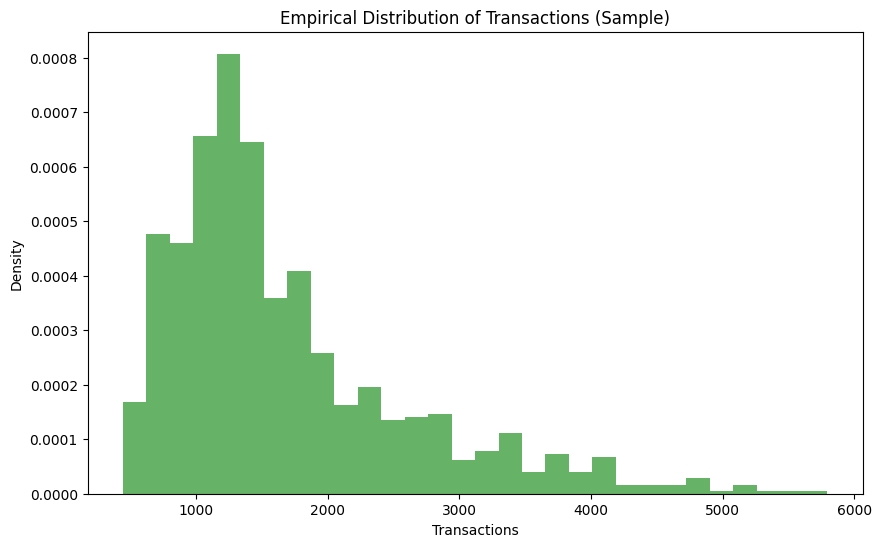

In [ ]:

import matplotlib.pyplot as plt

sample_size = 1000
transactions_sample = transactions.sample(n=sample_size, random_state=42)

print(transactions_sample['transactions'].describe())


plt.figure(figsize=(10, 6))
plt.hist(transactions_sample['transactions'], bins=30, density=True, alpha=0.6, color='g')
plt.title('Empirical Distribution of Transactions (Sample)')
plt.xlabel('Transactions')
plt.ylabel('Density')
plt.show()


In [ ]:

import scipy.stats as st

sample_mean = transactions_sample['transactions'].mean()
sample_std = transactions_sample['transactions'].std()
sample_size = len(transactions_sample)

confidence_level = 0.95

margin_of_error = st.t.ppf((1 + confidence_level) / 2, sample_size - 1) * (sample_std / (sample_size**0.5))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample Mean: {sample_mean}")
print(f"Confidence Interval ({confidence_level*100}%): {confidence_interval}")

mle_mean = transactions_sample['transactions'].mean()
mle_std = transactions_sample['transactions'].std()

print(f"Maximum Likelihood Estimate of the mean: {mle_mean}")
print(f"Maximum Likelihood Estimate of the standard deviation: {mle_std}")




Sample Mean: 1684.699
Confidence Interval (95.0%): (np.float64(1627.210740058029), np.float64(1742.1872599419712))
Maximum Likelihood Estimate of the mean: 1684.699
Maximum Likelihood Estimate of the standard deviation: 926.4128783756302


Probability Mass Function (PMF) for Transaction Category:
Category 'low': 0.468
Category 'medium': 0.285
Category 'high': 0.247


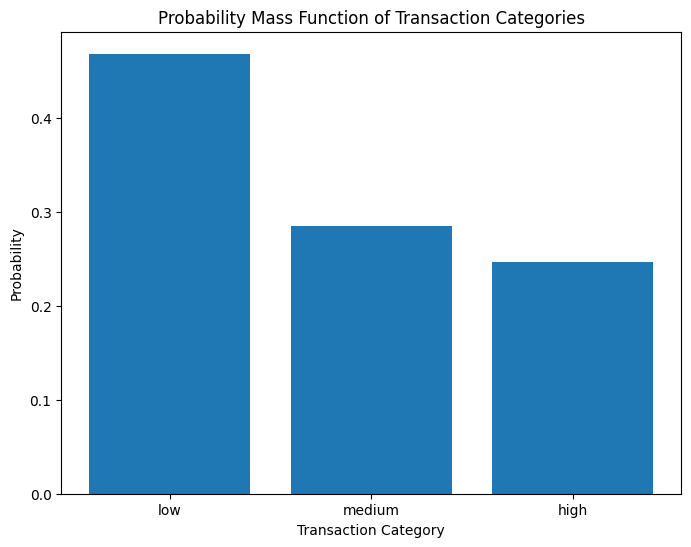

In [ ]:

import matplotlib.pyplot as plt

transaction_category_counts = transactions_sample['transaction_category'].value_counts()
transaction_category_probabilities = transaction_category_counts / len(transactions_sample)


print("Probability Mass Function (PMF) for Transaction Category:")
for category, probability in transaction_category_probabilities.items():
  print(f"Category '{category}': {probability}")

plt.figure(figsize=(8, 6))
plt.bar(transaction_category_probabilities.index, transaction_category_probabilities.values)
plt.xlabel("Transaction Category")
plt.ylabel("Probability")
plt.title("Probability Mass Function of Transaction Categories")
plt.show()


In [ ]:

import numpy as np

from scipy.stats import norm

null_hypothesis_mean = 1500

sample_mean = transactions_sample['transactions'].mean()
sample_std = transactions_sample['transactions'].std()
sample_size = len(transactions_sample)

z_score = (sample_mean - null_hypothesis_mean) / (sample_std / (sample_size**0.5))

alpha = 0.05

critical_z = norm.ppf(1 - alpha/2)

print(f"Z-score: {z_score}")
print(f"Critical Z-value: {critical_z}")


if abs(z_score) > critical_z:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")


from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(transactions_sample['transactions'], null_hypothesis_mean)


print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


if p_value < alpha:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")

from scipy.stats import chisquare

observed_frequencies = transactions_sample['transaction_category'].value_counts().values


expected_proportions = [1/3, 1/3, 1/3]

expected_frequencies = len(transactions_sample) * np.array(expected_proportions)

chi2, p = chisquare(observed_frequencies, f_exp = expected_frequencies)

print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Z-score: 6.30463517065464
Critical Z-value: 1.959963984540054
Reject the null hypothesis.
T-statistic: 6.304635170654639
P-value: 4.328904668708543e-10
Reject the null hypothesis.
Chi-Square statistic: 83.77400000000002
P-value: 6.437348726301871e-19
Reject the null hypothesis.


### Training Dataset

In [ ]:
train_data=pd.read_csv('/content/train.csv')

In [ ]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [ ]:
train_data.shape

(506167, 6)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506167 entries, 0 to 506166
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           506167 non-null  int64  
 1   date         506167 non-null  object 
 2   store_nbr    506166 non-null  float64
 3   family       506166 non-null  object 
 4   sales        506166 non-null  float64
 5   onpromotion  506166 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 23.2+ MB


In [ ]:
train_data.isna().sum()

,0
id,0
date,0
store_nbr,1
family,1
sales,1
onpromotion,1


In [ ]:

print(train_data[train_data['store_nbr'].isnull()])


            id  date  store_nbr family  sales  onpromotion
506166  506166  2013        NaN    NaN    NaN          NaN


In [ ]:

train_data.dropna(subset=['store_nbr'], inplace=True)
print(train_data[train_data['store_nbr'].isnull()])


Empty DataFrame
Columns: [id, date, store_nbr, family, sales, onpromotion]
Index: []


In [ ]:
def print_with_title(title, content):
    print("=" * 30)
    print(title)
    print("=" * 30)
    print(content)

def resumetable(df):
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary['Missing Values'] = df.isna().sum().values
    summary['Unique Values'] = df.nunique().values
    summary['Min Value'] = df.min().values
    summary['Max Value'] = df.max().values
    return summary

train_data['date'] = pd.to_datetime(train_data['date'])

# Create new features from date
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['day_of_week'] = train_data['date'].dt.dayofweek
train_data['is_weekend'] =train_data['date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
train_data['is_payday'] =train_data['date'].dt.day.apply(lambda x: 1 if x in [15, 30] else 0)

train_summary = resumetable(train_data)
print_with_title("train_data summary", train_summary)

train_data summary
                  Data Type  Missing Values  Unique Values  \
id                    int64               0         506166   
date         datetime64[ns]               0            285   
store_nbr           float64               0             54   
family               object               0             33   
sales               float64               0          63408   
onpromotion         float64               0              1   
year                  int32               0              1   
month                 int32               0             10   
day                   int32               0             31   
day_of_week           int32               0              7   
is_weekend            int64               0              2   
is_payday             int64               0              2   

                       Min Value            Max Value  
id                             0               506165  
date         2013-01-01 00:00:00  2013-10-12 00:00:00  
store_

In [ ]:
duplicateRows = train_data[train_data.duplicated()]
if not duplicateRows.empty:
    print("Duplicate Rows based on all columns are:\n", duplicateRows)
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.


In [ ]:
print(train_data[train_data['sales'] == 0].shape[0])

256612


There are no duplicate rows in Training DataFrame.

### Testing Dataset

In [ ]:
test_data=pd.read_csv('/content/test.csv')

In [ ]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
test_data.shape

(28512, 5)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data.dtypes

,0
id,int64
date,datetime64[ns]
store_nbr,int64
family,object
onpromotion,int64


In [ ]:
test_data.isna().sum()

,0
id,0
date,0
store_nbr,0
family,0
onpromotion,0


In [ ]:
duplicateRows = test_data[test_data.duplicated()]
if not duplicateRows.empty:
    print("Duplicate Rows based on all columns are:\n", duplicateRows)
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.


There are no duplicate rows in Testing DataFrame.

### Merged Dataframe

In [ ]:


merged_df = pd.merge(transactions, stores, on='store_nbr', how='left')

merged_df = pd.merge(merged_df, oil, on='date', how='left')

merged_df = pd.merge(merged_df, holiday_events, on='date', how='left')

print(merged_df)

            date  store_nbr  transactions transaction_category       city  \
0     2013-01-01         25           770                  low    Salinas   
1     2013-01-02          1          2111                 high      Quito   
2     2013-01-02          2          2358                 high      Quito   
3     2013-01-02          3          3487                 high      Quito   
4     2013-01-02          4          1922               medium      Quito   
...          ...        ...           ...                  ...        ...   
85002 2017-08-15         50          2804                 high     Ambato   
85003 2017-08-15         51          1573               medium  Guayaquil   
85004 2017-08-15         52          2255                 high      Manta   
85005 2017-08-15         53           932                  low      Manta   
85006 2017-08-15         54           802                  low  El Carmen   

             state  cluster  dcoilwtico     type    locale locale_name  \
0

In [ ]:
merged_df.head()

,date,store_nbr,transactions,transaction_category,city,state,cluster,dcoilwtico,type,locale,locale_name,description,transferred
0,2013-01-01,25,770,low,Salinas,Santa Elena,1,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-02,1,2111,high,Quito,Pichincha,13,93.14,NaN,NaN,NaN,NaN,NaN
2,2013-01-02,2,2358,high,Quito,Pichincha,13,93.14,NaN,NaN,NaN,NaN,NaN
3,2013-01-02,3,3487,high,Quito,Pichincha,8,93.14,NaN,NaN,NaN,NaN,NaN
4,2013-01-02,4,1922,medium,Quito,Pichincha,9,93.14,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.dtypes

,0
date,datetime64[ns]
store_nbr,int64
transactions,int64
transaction_category,object
city,object
state,object
cluster,int64
dcoilwtico,float64
type,object
locale,object


In [ ]:
merged_df.isnull().sum()

,0
date,0
store_nbr,0
transactions,0
transaction_category,0
city,0
state,0
cluster,0
dcoilwtico,24462
type,71096
locale,71096


In [ ]:
merged_df = merged_df.copy()
merged_df['dcoilwtico'] = merged_df['dcoilwtico'].bfill()
merged_df['type'] = merged_df['type'].fillna('No Holiday')
merged_df['locale'] = merged_df['locale'].fillna('N/A')
merged_df['locale_name'] = merged_df['locale_name'].fillna('N/A')
merged_df['description'] = merged_df['description'].fillna('No Event')
merged_df['transferred'] = merged_df['transferred'].fillna(False)



<ipython-input-69-0d0c3862239e>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['transferred'] = merged_df['transferred'].fillna(False)


In [ ]:
merged_df.head()

,date,store_nbr,transactions,transaction_category,city,state,cluster,dcoilwtico,type,locale,locale_name,description,transferred
0,2013-01-01,25,770,low,Salinas,Santa Elena,1,93.14,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-02,1,2111,high,Quito,Pichincha,13,93.14,No Holiday,N/A,N/A,No Event,False
2,2013-01-02,2,2358,high,Quito,Pichincha,13,93.14,No Holiday,N/A,N/A,No Event,False
3,2013-01-02,3,3487,high,Quito,Pichincha,8,93.14,No Holiday,N/A,N/A,No Event,False
4,2013-01-02,4,1922,medium,Quito,Pichincha,9,93.14,No Holiday,N/A,N/A,No Event,False


In [ ]:
#Rolling Mean or Moving Average
transactions["rolling_mean"] = transactions.groupby("store_nbr")["transactions"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

transactions["deviation"] = abs(transactions["transactions"] - transactions["rolling_mean"])

threshold = transactions["deviation"].quantile(0.95)
outliers_time_series = transactions[transactions["deviation"] > threshold]
print(f"Outliers detected (Time-Series method): {len(outliers_time_series)}")

Outliers detected (Time-Series method): 4175


In [ ]:
tot_sales_day = train_data.groupby('date')['sales'].sum()

## Data Insights or Exploratory Data Analysis

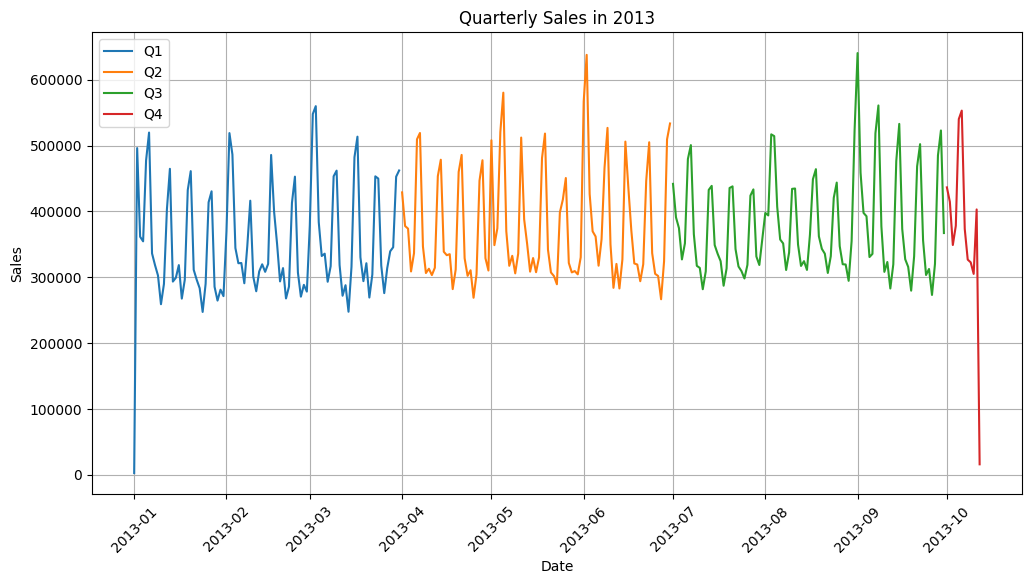

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_quarterly_sales(tot_sales_day, y):
    if not isinstance(tot_sales_day.index, pd.DatetimeIndex):
        raise ValueError("The index of the series must be a DatetimeIndex.")

    plt.figure(figsize=(12, 6))

    for quarter in range(1, 5):
        quarterly_sales = tot_sales_day[tot_sales_day.index.quarter == quarter]
        if not quarterly_sales.empty:
            plt.plot(quarterly_sales.index, quarterly_sales.values, label=f"Q{quarter}")

    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.title(f"Quarterly Sales in {y}")
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.legend()
    plt.grid(True)

    plt.show()

# Extract unique years
years = tot_sales_day.index.year.unique()

for y in years:
    plot_quarterly_sales(tot_sales_day[tot_sales_day.index.year == y], y)


**Descriptive** **Analytics**

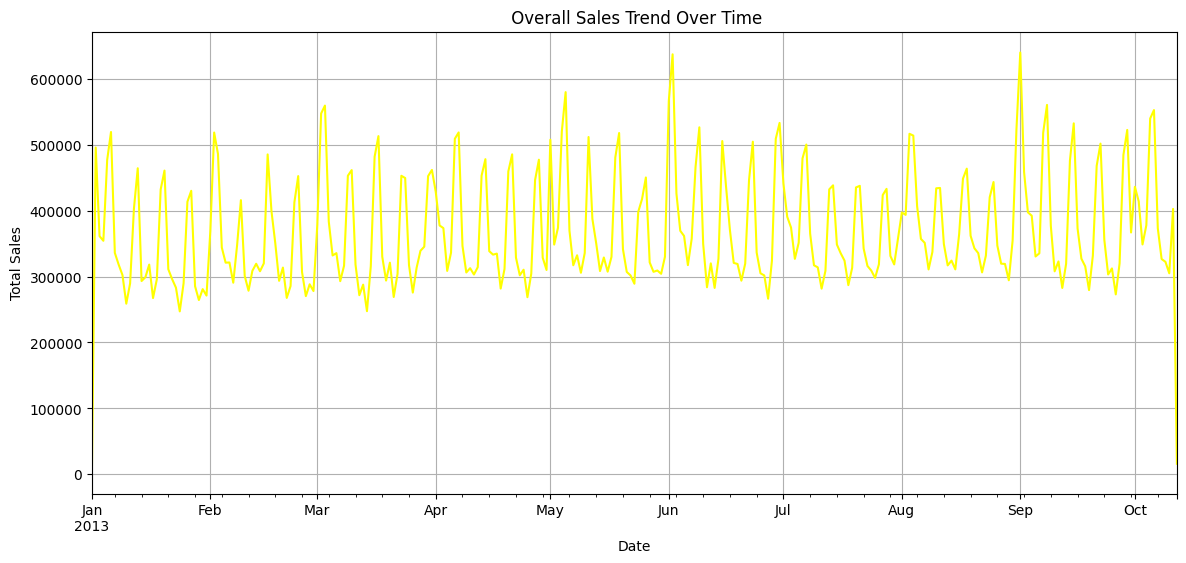

In [ ]:
plt.figure(figsize=(14, 6))
train_data.groupby('date').sum()['sales'].plot(title=' Overall Sales Trend Over Time', color='yellow')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Descriptive** **Analytics**

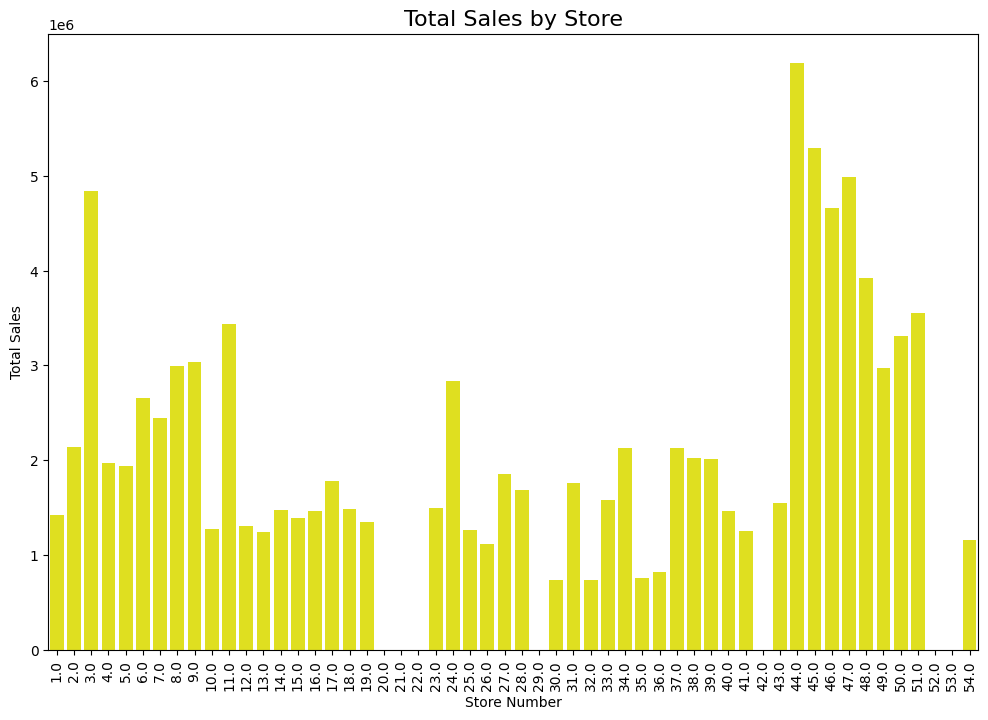

In [ ]:
stores = train_data.groupby('store_nbr')['sales'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='store_nbr', y='sales', data=stores.sort_values('sales', ascending=False), color='yellow')
plt.title('Total Sales by Store', fontsize=16)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

**Diagnostic** **Analytics**

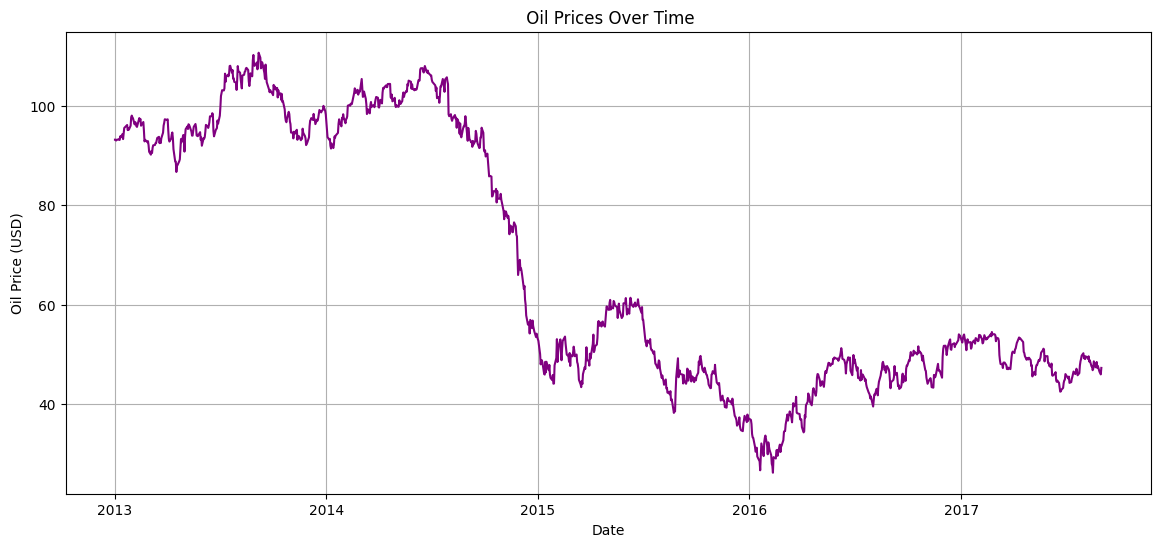

Train date type: datetime64[ns], Oil date type: datetime64[ns]
Sample of merged dataset:
        date  sales  dcoilwtico
0 2013-01-01    0.0       93.14
1 2013-01-01    0.0       93.14
2 2013-01-01    0.0       93.14
3 2013-01-01    0.0       93.14
4 2013-01-01    0.0       93.14


In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(oil['date'], oil['dcoilwtico'], color='purple')
plt.title(' Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price (USD)')
plt.grid(True)
plt.show()

print(f"Train date type: {train_data['date'].dtype}, Oil date type: {oil['date'].dtype}")

train_oil = pd.merge(train_data, oil, on='date', how='left')

print("Sample of merged dataset:")
print(train_oil[['date', 'sales', 'dcoilwtico']].head())


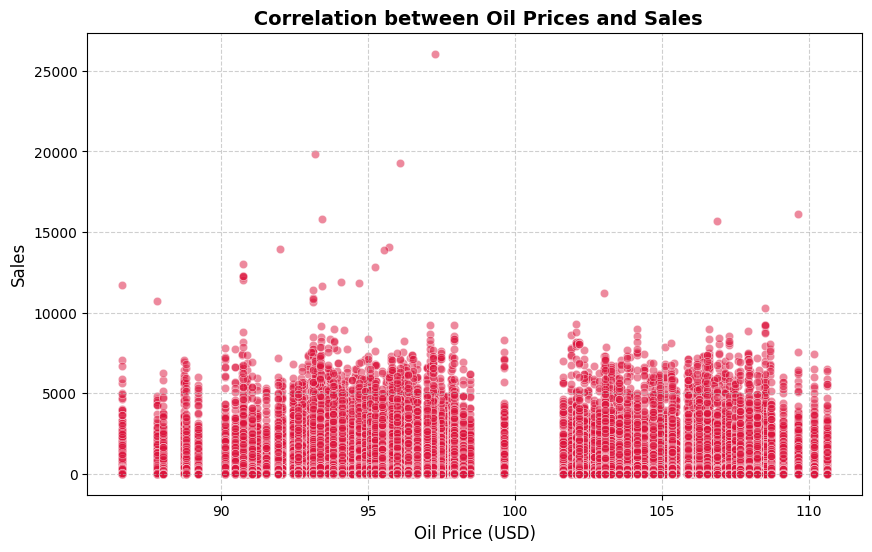

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_oil, x='dcoilwtico', y='sales', alpha=0.5, color="crimson")
plt.title(' Correlation between Oil Prices and Sales', fontsize=14, fontweight='bold')
plt.xlabel('Oil Price (USD)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

   id       date  store_nbr      family  sales  onpromotion  year  month  day  \
0   0 2013-01-01        1.0  AUTOMOTIVE    0.0          0.0  2013      1    1   
1   1 2013-01-01        1.0   BABY CARE    0.0          0.0  2013      1    1   
2   2 2013-01-01        1.0      BEAUTY    0.0          0.0  2013      1    1   
3   3 2013-01-01        1.0   BEVERAGES    0.0          0.0  2013      1    1   
4   4 2013-01-01        1.0       BOOKS    0.0          0.0  2013      1    1   

   day_of_week  is_weekend  is_payday  
0            1           0          0  
1            1           0          0  
2            1           0          0  
3            1           0          0  
4            1           0          0  


<ipython-input-78-afd05deed8db>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="viridis")


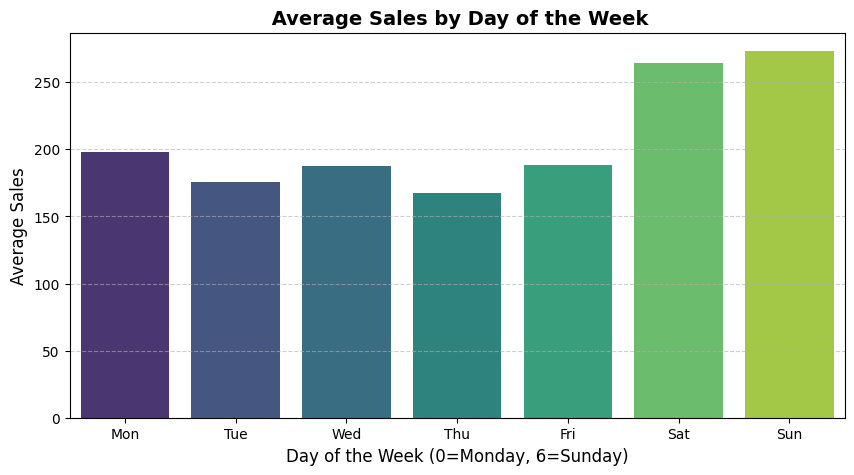

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'])

train_data['day_of_week'] = train_data['date'].dt.dayofweek

print(train_data.head())

sales_by_day = train_data.groupby("day_of_week")["sales"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="viridis")

plt.title(" Average Sales by Day of the Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

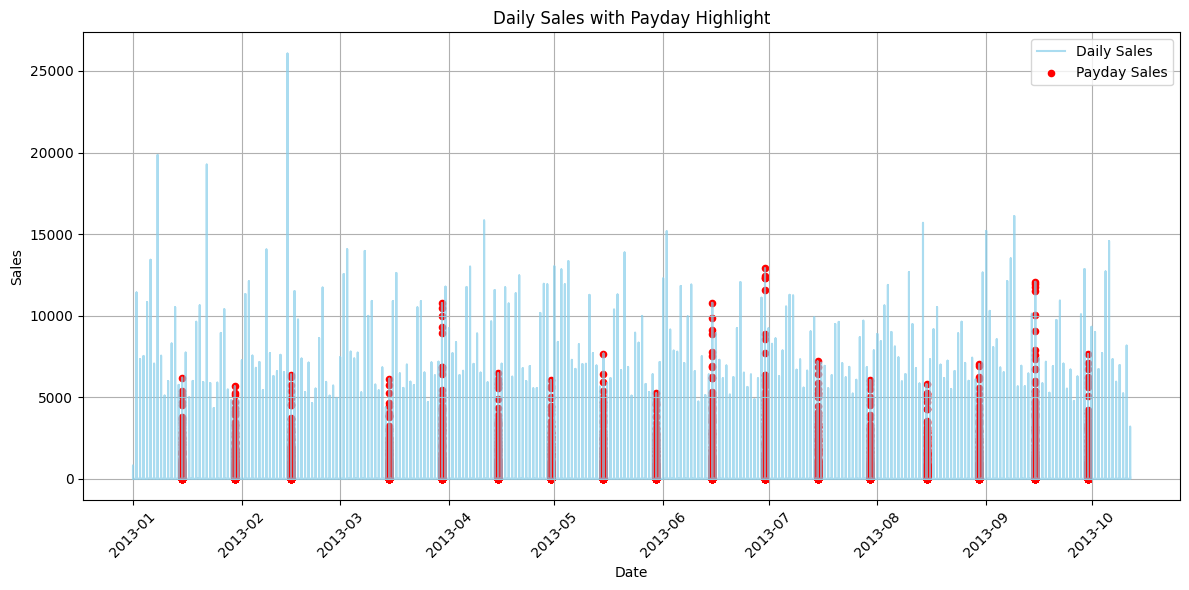

<ipython-input-79-cddb733951a8>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payday_sales_by_store.index, y=payday_sales_by_store.values, palette='viridis')


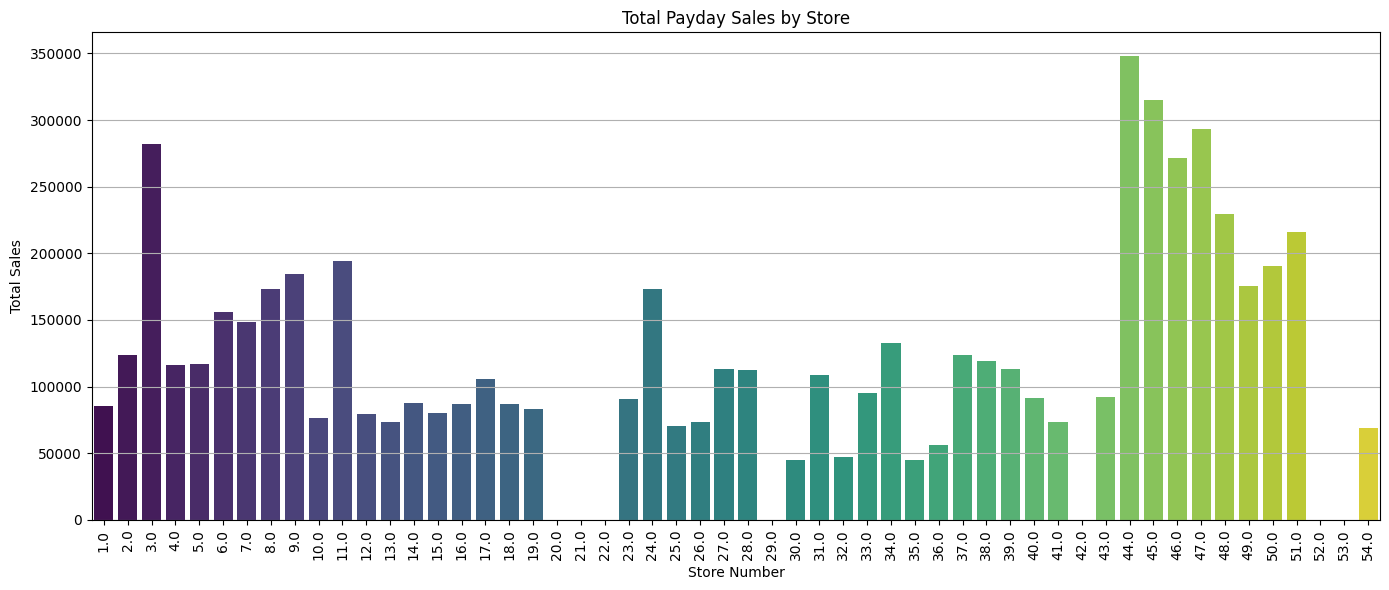

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


if 'is_payday' not in train_data.columns:
  train_data['is_payday'] = train_data['date'].dt.day.apply(lambda x: 1 if x in [15, 30] else 0)

# Sales Trend Over Time, highlighting paydays
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['sales'], label='Daily Sales', color='skyblue', alpha=0.7)
paydays = train_data[train_data['is_payday'] == 1]
plt.scatter(paydays['date'], paydays['sales'], color='red', label='Payday Sales', s=20)
plt.title('Daily Sales with Payday Highlight')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Payday sales by Store Number
plt.figure(figsize=(14, 6))
payday_sales_by_store = train_data[train_data['is_payday'] == 1].groupby('store_nbr')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=payday_sales_by_store.index, y=payday_sales_by_store.values, palette='viridis')
plt.title('Total Payday Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')
plt.show()




**Predictive** **Analytics**

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Aggregate sales per day
sales_per_day = train_data.groupby("date")["sales"].sum()

# # Fit SARIMA model
sarima_model = SARIMAX(sales_per_day, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_results = sarima_model.fit()

# # Forecast next 15 days
forecast_sarima = sarima_results.forecast(steps=15)
print(forecast_sarima)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2013-10-13   -100827.951701
2013-10-14    -46474.459682
2013-10-15    -38419.257293
2013-10-16    -46314.251295
2013-10-17    -97945.896708
2013-10-18   -107248.479216
2013-10-19    -50692.612460
2013-10-20    -50327.494508
2013-10-21    -39250.655755
2013-10-22    -26711.405704
2013-10-23    -44814.350584
2013-10-24     -2305.194221
2013-10-25     40354.513598
2013-10-26     39135.500265
2013-10-27     28116.201251
Freq: D, Name: predicted_mean, dtype: float64


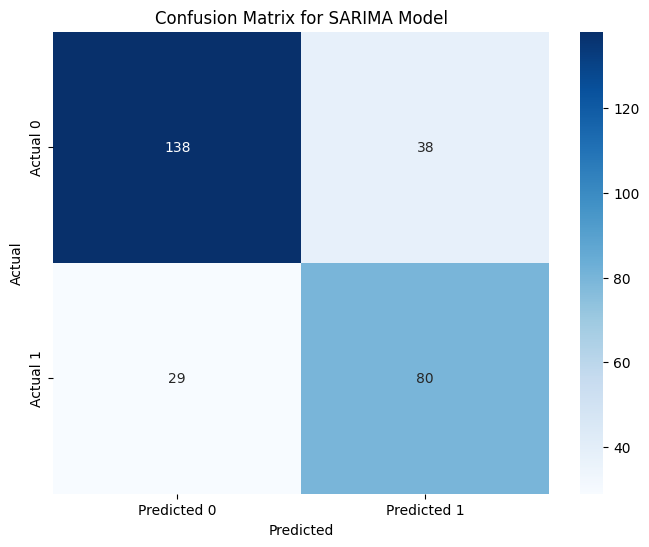

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = sarima_results.get_prediction(start=sales_per_day.index[0], end=sales_per_day.index[-1])
predicted_mean = predictions.predicted_mean

threshold = sales_per_day.mean()
actual_categories = (sales_per_day > threshold).astype(int)
predicted_categories = (predicted_mean > threshold).astype(int)

cm = confusion_matrix(actual_categories, predicted_categories)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for SARIMA Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


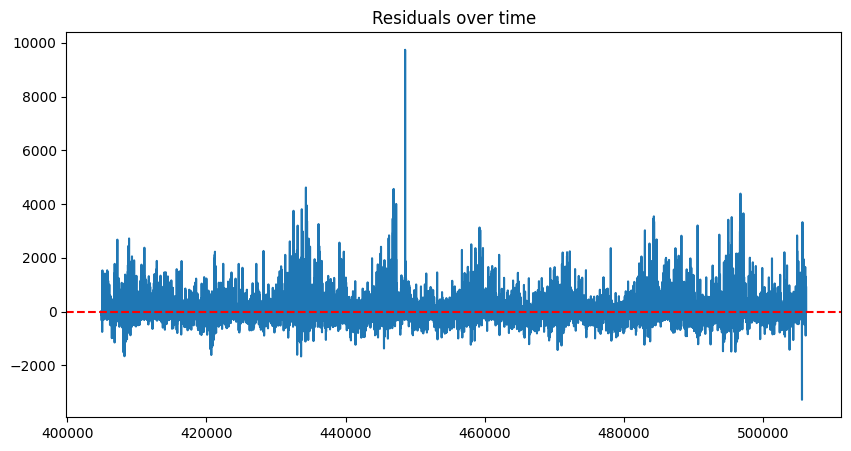

In [ ]:
import matplotlib.pyplot as plt
residuals = y_val - y_pred  # or actual - predicted
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title("Residuals over time")
plt.axhline(0, color='red', linestyle='--')


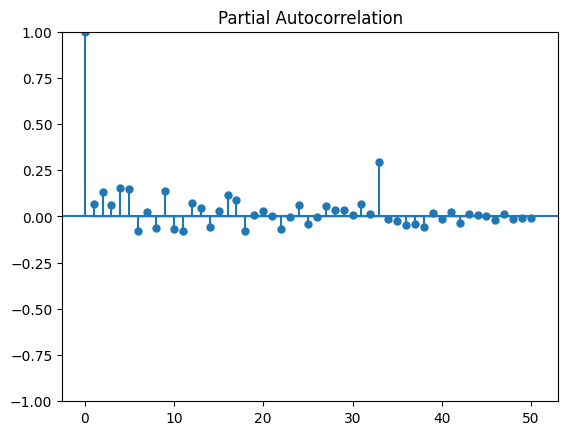

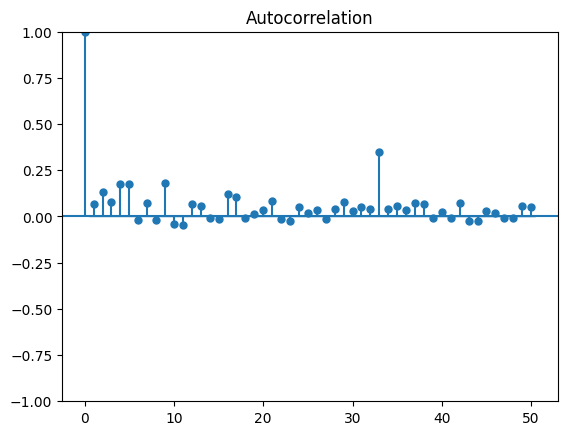

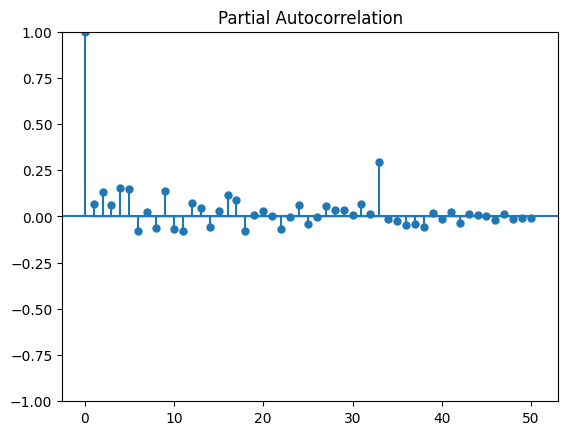

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals, lags=50)
plot_pacf(residuals, lags=50)


In [ ]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # weekly seasonality, adjust based on data

model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
results = model.fit()

pred = results.predict(start=0, end=len(y)-1)

plt.figure(figsize=(14, 6))
plt.plot(y.index, y, label='Actual Sales', color='blue')
plt.plot(y.index, pred, label='Predicted Sales (SARIMA)', color='red')
plt.title('Actual vs Predicted Sales using SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
import numpy as np

accuracy = np.trace(cm) / np.sum(cm)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7649122807017544


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, accuracy_score  # Import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Feature engineering
train_features = train_data.copy()
train_features["day"] = pd.to_datetime(train_features["date"]).dt.day
train_features["month"] = pd.to_datetime(train_features["date"]).dt.month
train_features["year"] = pd.to_datetime(train_features["date"]).dt.year

# Encode categorical
train_features = pd.get_dummies(train_features, columns=["store_nbr", "family"])

# Define features & target
X = train_features.drop(["sales", "date"], axis=1)
y = train_features["sales"]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Forecast next 15 days
y_pred = xgb.predict(X_val)

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

# Calculate Accuracy (for classification tasks)
threshold = y_train.mean() # Define a threshold (e.g., average sales)
y_pred_binary = [1 if p >= threshold else 0 for p in y_pred] # Convert predictions to binary
y_val_binary = [1 if a >= threshold else 0 for a in y_val] # Convert actual values to binary

accuracy = accuracy_score(y_val_binary, y_pred_binary)
print(f"Accuracy (based on threshold): {accuracy}")

RMSE: 200.91155712538577
Accuracy (based on threshold): 0.9331647470217516


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE
mse = mean_squared_error(y_val, y_pred)

# Calculate RMSE from MSE
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 200.91155712538577
